# Data processing

In [48]:
#Project
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook_connected"
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import matplotlib.pylab as plt

df = pd.read_csv("data_cleaned_2021.csv")
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,...,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,...,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,...,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,...,0,0,0,0,0,0,0,data scientist,na,na


## 1. drop variables

In [49]:
#drop variables
df1 = df.drop(labels = ['index','Location','Company Name','Competitors',
                        'Job Title','Job Description','Salary Estimate'],axis = 1)
#index: useless
#salary estimate: useless
#job title: useless
#Job Description useless
#Company Name: repeated
#Location: repeated
#Competitors: to many null
df1

,Rating,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Hourly,Employer provided,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,3.8,"Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,...,0,0,1,1,0,0,0,data scientist,na,M
1,3.4,"Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,...,0,0,0,0,0,0,0,data scientist,na,M
2,4.8,"Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,...,0,0,0,0,0,0,0,data scientist,na,M
3,3.8,"Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,0,...,0,0,0,0,0,0,0,data scientist,na,na
4,2.9,"New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,0,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,3.9,"Brentford, United Kingdom",10000+,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),0,0,...,0,0,0,0,0,0,0,other scientist,sr,M
738,4.4,"San Francisco, CA",1001 - 5000,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),0,0,...,0,1,0,0,0,0,0,data engineer,sr,na
739,2.6,"Pittsburgh, PA",501 - 1000,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0,0,...,0,0,0,0,0,0,0,other scientist,na,P
740,3.2,"Chadds Ford, PA",1 - 50,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),0,0,...,0,0,0,0,0,0,0,data scientist,na,na


## 2. check null and replace

In [50]:
#check null
print(df1.isnull().any().sum())

0


In [51]:
#replace -1 and '-1' to null

df1 = df1.replace(['-1'],[np.nan])
df1 = df1.replace([-1],[np.nan])
df1.isnull().any().sum()
#6 varibles have null

6

In [52]:
df1.isnull().sum()

Rating                11
Headquarters           1
Size                   0
Founded               50
Type of ownership      0
Industry              10
Sector                10
Revenue                0
Hourly                 0
Employer provided      0
Lower Salary           0
Upper Salary           0
Avg Salary(K)          0
company_txt            0
Job Location           0
Age                   50
Python                 0
spark                  0
aws                    0
excel                  0
sql                    0
sas                    0
keras                  0
pytorch                0
scikit                 0
tensor                 0
hadoop                 0
tableau                0
bi                     0
flink                  0
mongo                  0
google_an              0
job_title_sim          0
seniority_by_title     0
Degree                 0
dtype: int64

# Data exploration

In [53]:
# For categorial variables
#mode()[0]:use the highest frequency 
df1["Headquarters"] = df1["Headquarters"].fillna(df1["Headquarters"].mode()[0])


df1["Sector"] = df1["Sector"].fillna(df1["Sector"].mode()[0])
df1["Industry"] = df1["Industry"].fillna(df1["Industry"].mode()[0])


C:\Users\He\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



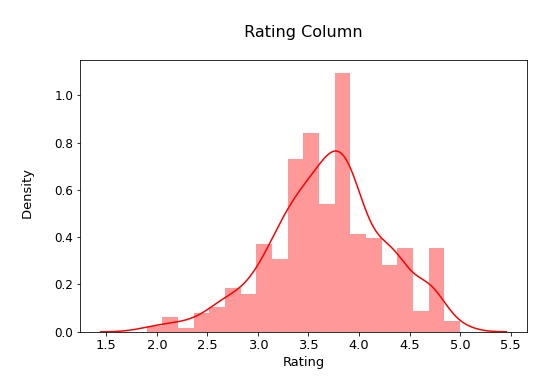

In [54]:
# For numerical variables
#Rating column
plt.figure(figsize=(8,5))
plt.title('\n Rating Column \n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(df1.Rating,color="red")
plt.show()
#if nomoral distribution, use mean value to replace

C:\Users\He\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



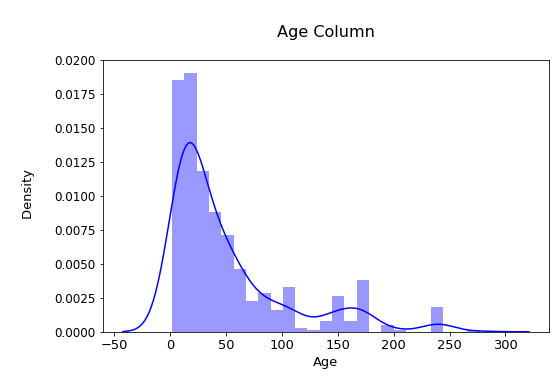

In [55]:
#Age column
plt.figure(figsize=(8,5))
plt.title('\n Age Column \n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(df1.Age,color="blue")
plt.show()
#median to replace

C:\Users\He\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



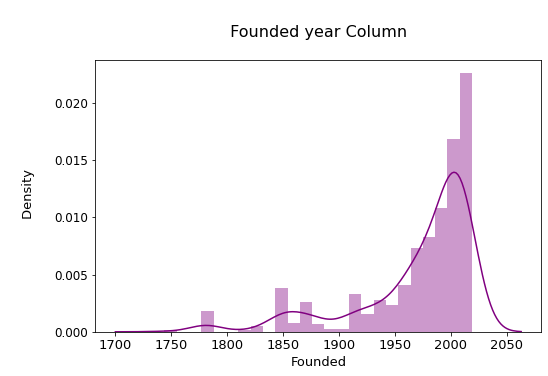

In [56]:
#founded column
plt.figure(figsize=(8,5))
plt.title('\n Founded year Column \n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(df1.Founded,color="purple")
plt.show()
#median to replace

In [57]:
#replace
df1["Rating"] = df1["Rating"].fillna(df1["Rating"].mean())
df1["Age"] = df1["Age"].fillna(df1["Age"].median())
df1["Founded"] = df1["Founded"].fillna(df1["Founded"].median())

In [58]:
#check
df1.isnull().any().sum()
#no null

0

# Data visualization

## 1.choropleth map

In [59]:
#choropleth map: the relationship between average salary and region
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df_choro = df1.groupby("Job Location")["Avg Salary(K)"].mean().reset_index()

fig = go.Figure(data=go.Choropleth(
    locations=df_choro['Job Location'], 
    z = df_choro['Avg Salary(K)'],
    locationmode="USA-states", 
    colorscale = 'Reds',
    colorbar_tickprefix = 'Salary(USD)',


    colorbar_title = "Average salaries ",
))

fig.update_layout(
    title_text = 'Average salaries of data scientists in U.S.',
    geo_scope='usa', 
)

fig.show()

## 2.Tree map

In [60]:
#Then we wanted to know further. Is it true that the higher the salary the higher the 
#number of companies owned by the state
import plotly.express as px
fig = px.treemap(
df1, path=[px.Constant("usa"), 'Job Location','company_txt'], values='Avg Salary(K)',
                  color='Avg Salary(K)', 

)

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

C:\Users\He\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\He\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\He\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## 3. Folding Line Chart

C:\Users\He\AppData\Local\Temp\ipykernel_47120\582607622.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\He\AppData\Local\Temp\ipykernel_47120\582607622.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



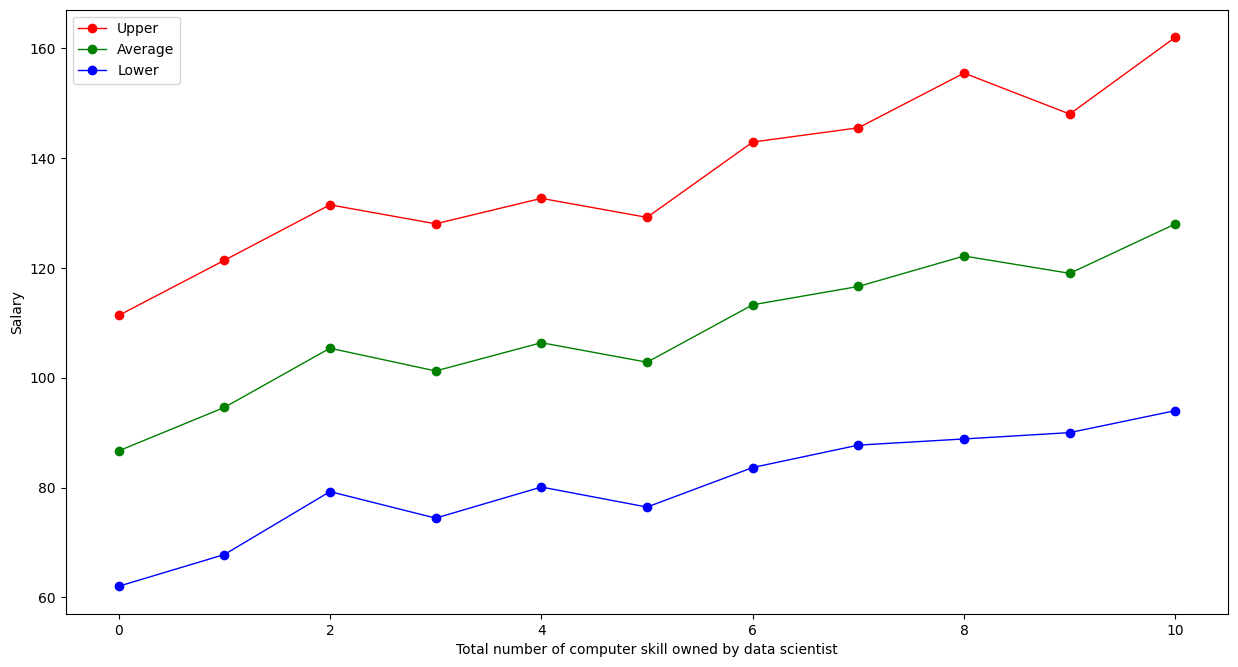

In [61]:
#number of skills
df_skill = df1.iloc[:,[10,11,12,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]]
df_skill['skill sum']=np.sum(df_skill.iloc[:,3:19],axis=1)

Skill=df_skill.groupby("skill sum")["skill sum","Avg Salary(K)","Lower Salary","Upper Salary"].mean()
skx = Skill['skill sum']
sky1 =  Skill['Upper Salary']
sky2 =  Skill['Avg Salary(K)']
sky3 =  Skill['Lower Salary']
plt.figure(dpi=100,figsize=(15,8))
plt.plot(skx, sky1, label='Upper',linewidth=1,color='r',marker='o')
plt.plot(skx, sky2, label='Average',linewidth=1,color='g',marker='o')
plt.plot(skx, sky3, label='Lower',linewidth=1,color='b',marker='o')
plt.xlabel('Total number of computer skill owned by data scientist')
plt.ylabel('Salary')
plt.legend()
plt.show()

## 4. Histogram

            Size  Avg Salary(K)  Lower Salary  Upper Salary  Order
0        1 - 50      105.064516     78.580645    131.548387      1
6      51 - 200      111.771277     84.468085    139.074468      2
3     201 - 500      100.247863     72.136752    128.358974      3
5    501 - 1000       91.503731     66.865672    116.141791      4
2   1001 - 5000       94.690000     68.953333    120.426667      5
4  5001 - 10000       97.486842     70.421053    124.552632      6
1        10000+      112.803846     83.661538    141.946154      7


C:\Users\He\AppData\Local\Temp\ipykernel_47120\3638200383.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



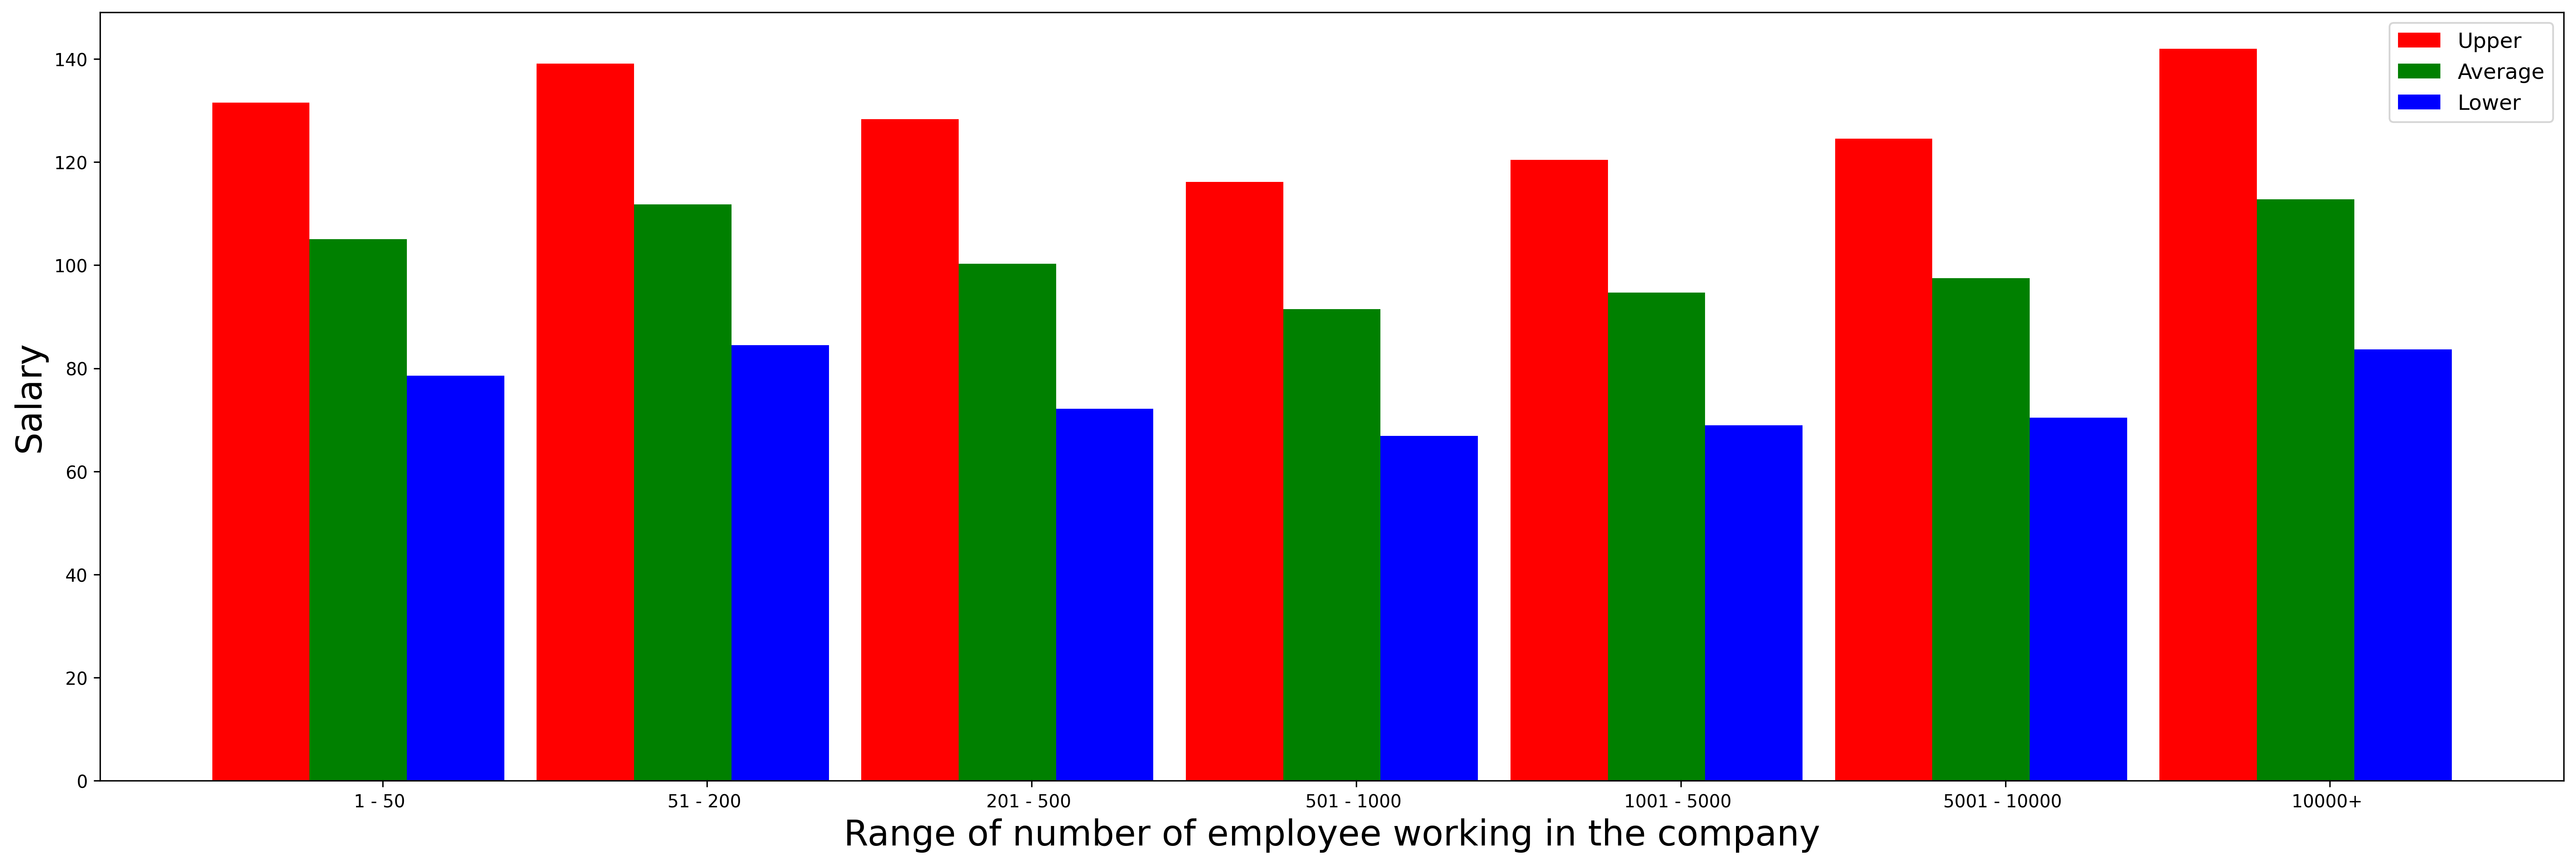

In [62]:
#The relationship between company size and salary 

df_siC = df1[~df1['Size'].isin(["unknown"])]
Size=df_siC.groupby("Size")["Avg Salary(K)","Lower Salary","Upper Salary"].mean().reset_index()
Size['Order'] = [1,7,5,3,6,4,2]
Size = Size.sort_values(by="Order",ascending=True)

print(Size)

Sx = Size['Size']
Sy1 =  Size['Upper Salary']
Sy2 =  Size['Avg Salary(K)']
Sy3 =  Size['Lower Salary']
bar_width = 0.3
index_u = np.arange(len(Sx))
index_a = index_u + bar_width
index_l = index_u + bar_width + bar_width
plt.figure(dpi=300,figsize=(25,8))
plt.bar(index_u, height=Sy1, width=bar_width, color='r', label='Upper',)
plt.bar(index_a, height=Sy2, width=bar_width, color='g', label='Average')
plt.bar(index_l, height=Sy3, width=bar_width, color='b', label='Lower')
plt.xlabel('Range of number of employee working in the company',fontsize=20)
plt.ylabel('Salary',fontsize=20)
plt.xticks(index_a + bar_width/4, Sx, fontsize=10)
plt.legend(fontsize=12)


## 5.Pie Chart

          rating    %rating
0   1001 - 5000   20.215633
1    501 - 1000   18.059299
2        10000+   17.520216
3     201 - 500   15.768194
4      51 - 200   12.668464
5  5001 - 10000   10.242588
6        1 - 50    4.177898
7        unknown   1.347709


([<matplotlib.patches.Wedge at 0x1a335c37220>,
 [Text(-0.9777894849362951, 1.970768307830227, '1001 - 5000 '),
  Text(-2.1906544625194284, -0.202566102405398, '501 - 1000 '),
  Text(-0.776705335136853, -2.05833156278816, '10000+ '),
  Text(1.3918116023029465, -1.7037782906513703, '201 - 500 '),
  Text(2.1999376771255688, 0.016559491639488, '51 - 200 '),
  Text(1.643340331324157, 1.4626799224175502, '5001 - 10000 '),
  Text(0.8373593541386684, 2.0344112937251584, '1 - 50 '),
  Text(0.4733878283543448, 2.14846549052247, 'unknown')],
 [Text(-0.533339719056161, 1.07496453154376, '20.2%'),
  Text(-1.1949024341015064, -0.11049060131203525, '18.1%'),
  Text(-0.4236574555291925, -1.12272630697536, '17.5%'),
  Text(0.7591699648925162, -0.9293336130825656, '15.8%'),
  Text(1.1999660057048556, 0.009032449985175271, '12.7%'),
  Text(0.89636745344954, 0.7978254122277545, '10.2%'),
  Text(0.45674146589381903, 1.10967888748645, '4.2%'),
  Text(0.2582115427387335, 1.1718902675577108, '1.3%')])

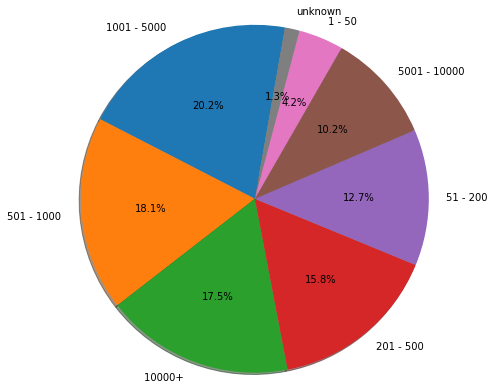

In [63]:
#Percentage of the number of companies of different sizes

percent = pd.DataFrame(df['Size'].value_counts(normalize=True)*100).reset_index()
percent.columns = ['rating', '%rating']
print(percent)

labels = percent['rating']
sizes = percent['%rating']

explode = (0, 0, 0, 0,0,0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=800,pctdistance = 0.6,radius = 2)

In [64]:
#Before prediction

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

#-----------1. recheck， delete useless varibles
df2 = df1.drop(labels = ['Headquarters','Industry','Hourly','Employer provided',
                'Lower Salary','Upper Salary','company_txt'],axis = 1,inplace = False)


#----------2.deal with categoricak varible
#extract
df_num = df2.select_dtypes(include = np.number)
df_cate = df2.select_dtypes(include = object)

#dummy encode the categorical variables
df_dumm = pd.get_dummies(df_cate, drop_first = True)

df_all = pd.concat([df_num,df_dumm],axis = 1)

#----------3.devide data
X = df_all.drop(['Avg Salary(K)'],axis = 1)
y = df_all['Avg Salary(K)']

def mean_error(y, y_pred):
    # assuming y and y_pred are numpy arrays
    return np.mean(y - y_pred)


In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook_connected"
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error





You should consider upgrading via the 'C:\Users\He\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


# Model implementation

## 1. Linear regression

### Build model

In [66]:
#Standard
sc = StandardScaler()
sc.fit(X)
X_linear  = sc.fit_transform(X)

#Partitioning
train_X,valid_X,train_y,valid_y = train_test_split(X_linear,y,test_size = 0.3, random_state = 1)
train_X.shape

Salary = LinearRegression()
Salary.fit(train_X,train_y)
regressionSummary(train_y, Salary.predict(train_X))



Regression statistics

                      Mean Error (ME) : 0.0029
       Root Mean Squared Error (RMSE) : 21.0767
            Mean Absolute Error (MAE) : 15.5207
          Mean Percentage Error (MPE) : -4.6090
Mean Absolute Percentage Error (MAPE) : 17.1976


In [67]:
regressionSummary(valid_y, Salary.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 126091574941.6243
       Root Mean Squared Error (RMSE) : 1087120970789.4363
            Mean Absolute Error (MAE) : 126091574959.9879
          Mean Percentage Error (MPE) : 121450019727.9660
Mean Absolute Percentage Error (MAPE) : 121450019750.2954


### Overfitting analysis. Because we have over 100 variables

In [68]:
#reduce varibles to check the overfitting
df1_all = df_all.iloc[:,0:20]
X1 = df1_all.drop(['Avg Salary(K)'],axis = 1)
y1 = df1_all['Avg Salary(K)']

#Standard
sc = StandardScaler()
sc.fit(X1)
X_over  = sc.fit_transform(X1)

#Partitioning
train_X,valid_X,train_y,valid_y = train_test_split(X_over,y1,test_size = 0.3, random_state = 1)
train_X.shape

Salary = LinearRegression()
Salary.fit(train_X,train_y)
regressionSummary(train_y, Salary.predict(train_X))

#Analysis of Result：overfitting

def mean_error(y, y_pred):
    # assuming y and y_pred are numpy arrays
    return np.mean(y_pred - y)





Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 34.0621
            Mean Absolute Error (MAE) : 26.7958
          Mean Percentage Error (MPE) : -13.0451
Mean Absolute Percentage Error (MAPE) : 31.4093


## 2. Lasso regression（Model1）

C:\Users\He\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 

C:\Users\He\AppData\Local\Temp\ipykernel_47120\1459630484.py:18: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\He\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_co

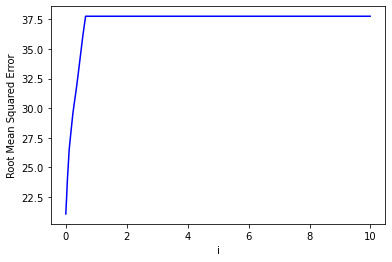

In [69]:
#Lasso helps us with the bias-variance tradeoff and select necessary features.
from math import sqrt
from sklearn.metrics import mean_squared_error

#Standard
sc = StandardScaler()
sc.fit(X)
X_lasso  = sc.fit_transform(X)

#Partition
train_X,valid_X,train_y,valid_y = train_test_split(X_lasso,y,test_size = 0.3, random_state = 1)
train_X.shape

results = []
L = np.arange(0,10,0.01)
for i in L:
  lasso = Lasso(normalize=True, alpha=i)
  lasso.fit(train_X, train_y)
  results.append({'i':i, 'RMSE':sqrt(mean_squared_error(train_y, lasso.predict(train_X)))})
  
results = pd.DataFrame(results)

plt.plot(results['i'], results['RMSE'], '-', color = 'blue')
plt.xlabel('i')
plt.ylabel('Root Mean Squared Error')
plt.show()


In [70]:
lasso_ = Lasso(normalize=True, alpha=0.1)
lasso_.fit(train_X, train_y)
regressionSummary(valid_y, lasso_.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 2.9976
       Root Mean Squared Error (RMSE) : 28.7474
            Mean Absolute Error (MAE) : 20.9645
          Mean Percentage Error (MPE) : -4.0941
Mean Absolute Percentage Error (MAPE) : 20.6098


C:\Users\He\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 



In [71]:
import math

lasso_ = Lasso(normalize=True, alpha=0.2)
lasso_.fit(train_X, train_y)
regressionSummary(valid_y, lasso_.predict(valid_X))


MSE_1 = np.square(np.subtract(valid_y, lasso_.predict(valid_X))).mean()
RMSE_1 = math.sqrt(MSE_1)
MAE_1 = mean_absolute_error(valid_y, lasso_.predict(valid_X))
MAPE_1 = mean_absolute_percentage_error(valid_y, lasso_.predict(valid_X))
ME_1 = mean_error(valid_y, lasso_.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 3.3346
       Root Mean Squared Error (RMSE) : 30.0853
            Mean Absolute Error (MAE) : 22.6378
          Mean Percentage Error (MPE) : -5.1118
Mean Absolute Percentage Error (MAPE) : 22.6816


C:\Users\He\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 



You should consider upgrading via the 'C:\Users\He\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


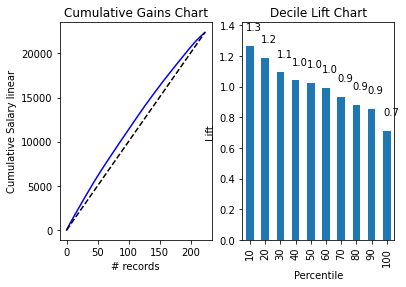

In [72]:
import pandas as pd
from dmba import liftChart,gainsChart



pre_v = pd.Series(lasso_.predict(valid_X))
pre_v = pre_v.sort_values(ascending = False)
fig, axes = plt.subplots(nrows = 1, ncols = 2 )
ax = gainsChart(pre_v, ax=axes[0],color = 'blue')
ax.set_ylabel('Cumulative Salary linear')
ax.set_title('Cumulative Gains Chart')

ax = liftChart(pre_v, ax= axes[1], labelBars = True)
ax.set_ylabel('Lift')
plt.show()


## 3. K-NN regression(Model 2)

            PC1       PC2       PC3
0     -2.187016 -0.314632 -0.298574
1    -17.738508  0.441023  0.482825
2    -54.514741 -1.041505 -0.137637
3      9.127825 -0.018270  0.018472
4    -37.545321 -0.444350 -0.541280
..          ...       ...       ...
737  200.054411  0.762555  1.037937
738  -48.857280 -1.034451  0.971790
739  -17.740834  1.809619 -0.458842
740  -29.056167  0.371961 -0.665390
741    6.300851  0.832822 -0.229747

[742 rows x 3 columns]
    k       RMSE
0   1  29.370867
1   2  30.186233
2   3  28.657314
3   4  29.650379
4   5  31.430246
5   6  32.511046
6   7  33.332892
7   8  33.712321
8   9  34.524410
9  10  34.711092


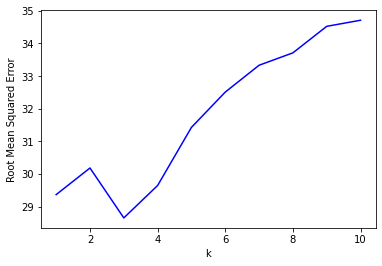


Regression statistics

                      Mean Error (ME) : 3.5591
       Root Mean Squared Error (RMSE) : 28.6573
            Mean Absolute Error (MAE) : 20.7760
          Mean Percentage Error (MPE) : -2.7748
Mean Absolute Percentage Error (MAPE) : 20.4921


In [73]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
import math
from sklearn.metrics import mean_squared_error


from sklearn.decomposition import PCA
pcs = PCA()
pcs = PCA(n_components = 3)
pcs.fit(X)
score_pc = pd.DataFrame(pcs.transform(X),
                     columns = ['PC1','PC2','PC3'])
print(score_pc)

train_X,valid_X,train_y,valid_y = train_test_split(score_pc,y,test_size = 0.25, random_state = 1)

results = []

for k in range(1,11,1):
    knn = KNeighborsRegressor(n_neighbors=k).fit(train_X, train_y)
    results.append({'k':k, 'RMSE':sqrt(mean_squared_error(valid_y, knn.predict(valid_X)))})
results = pd.DataFrame(results)
results.head()
print(results)


plt.plot(results['k'], results['RMSE'], '-', color = 'blue')
plt.xlabel('k')
plt.ylabel('Root Mean Squared Error')
plt.show()

knn_3 = KNeighborsRegressor(n_neighbors=3).fit(train_X, train_y)


MAE_2 = mean_absolute_error(valid_y, knn_3.predict(valid_X))

MSE_2 = np.square(np.subtract(valid_y, knn_3.predict(valid_X))).mean()
RMSE_2 = math.sqrt(MSE_2)
ME_2 = mean_error(valid_y, knn_3.predict(valid_X))
regressionSummary(valid_y, knn_3.predict(valid_X))

In [74]:
MSE_2 = np.square(np.subtract(valid_y, knn_3.predict(valid_X))).mean()

RMSE_2 = math.sqrt(MSE_2)
MAE_2 = mean_absolute_error(valid_y, knn_3.predict(valid_X))
MAPE_2 = mean_absolute_percentage_error(valid_y, knn_3.predict(valid_X))


## 4.  Regression tree(Model 3)

In [75]:
from collections import Counter
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary


In [76]:
train_X, valid_X, train_y, valid_y = train_test_split(X,y,test_size = 0.3, random_state = 1)

fullClassTree = DecisionTreeRegressor(random_state = 10)
tree = fullClassTree.fit(train_X, train_y)
regressionSummary(train_y, tree.predict(train_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1.3887
            Mean Absolute Error (MAE) : 0.1772
          Mean Percentage Error (MPE) : -0.0194
Mean Absolute Percentage Error (MAPE) : 0.1730


In [77]:
regressionSummary(valid_y, tree.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 1.3079
       Root Mean Squared Error (RMSE) : 26.5107
            Mean Absolute Error (MAE) : 14.2706
          Mean Percentage Error (MPE) : -1.2358
Mean Absolute Percentage Error (MAPE) : 14.1005


Number of nodes in the last tree is: 657 with ccp_alpha: 24


C:\Users\He\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\He\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\He\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\He\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\He\AppData\

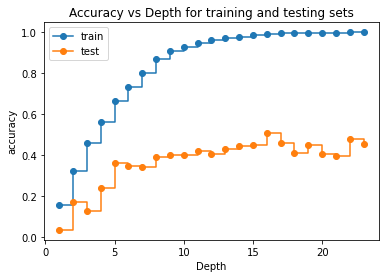

In [78]:
#prune tree
clfs = []
A = range(1,25,1)
for depth in A:
    clf = DecisionTreeRegressor(criterion='mse',random_state=10, max_depth = depth)
    clf.fit(train_X, train_y.astype(int))
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, A[-1]
    )
)

clfs = clfs[:-1]
A = A[:-1]
train_scores = [clf.score(train_X, train_y) for clf in clfs]
test_scores = [clf.score(valid_X, valid_y) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("Depth")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Depth for training and testing sets")
ax.plot(A, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(A, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


In [79]:
#depth = 16
prune_Tree = DecisionTreeRegressor(criterion='mse',random_state=10, max_depth = 16)
p_tree = prune_Tree.fit(train_X, train_y)
regressionSummary(valid_y, p_tree.predict(valid_X))


MSE_3 = np.square(np.subtract(valid_y, prune_Tree.predict(valid_X))).mean()

RMSE_3 = math.sqrt(MSE_3)
MAE_3 = mean_absolute_error(valid_y, prune_Tree.predict(valid_X))
MAPE_3 = mean_absolute_percentage_error(valid_y, prune_Tree.predict(valid_X))

ME_3 = mean_error(valid_y, prune_Tree.predict(valid_X))




Regression statistics

                      Mean Error (ME) : 1.5817
       Root Mean Squared Error (RMSE) : 26.5910
            Mean Absolute Error (MAE) : 15.0965
          Mean Percentage Error (MPE) : -0.7501
Mean Absolute Percentage Error (MAPE) : 14.7663


C:\Users\He\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



## 5. Random Forest(Model 4)

In [80]:
from sklearn.ensemble import RandomForestRegressor


Ran = RandomForestRegressor(n_estimators = 50, random_state = 10)
Ran.fit(train_X, train_y)
regressionSummary(valid_y, Ran.predict(valid_X))

MSE_4 = np.square(np.subtract(valid_y, Ran.predict(valid_X))).mean()
RMSE_4 = math.sqrt(MSE_4)
MAE_4 = mean_absolute_error(valid_y, Ran.predict(valid_X))
MAPE_4 = mean_absolute_percentage_error(valid_y, Ran.predict(valid_X))

ME_4 = mean_error(valid_y, Ran.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 3.4136
       Root Mean Squared Error (RMSE) : 22.6555
            Mean Absolute Error (MAE) : 14.9728
          Mean Percentage Error (MPE) : -0.5853
Mean Absolute Percentage Error (MAPE) : 14.0899


## 6. Neural network(Model 5)

In [81]:
from sklearn.neural_network import MLPRegressor

#3
clf = MLPRegressor(hidden_layer_sizes = (3), activation = 'relu',
                   solver = 'lbfgs', random_state = 10)

clf.fit(train_X, train_y)
regressionSummary(valid_y, clf.predict(valid_X))

#4
clf = MLPRegressor(hidden_layer_sizes = (4), activation = 'relu',
                   solver = 'lbfgs', random_state = 10)

clf.fit(train_X, train_y)
regressionSummary(valid_y, clf.predict(valid_X))

#5
clf = MLPRegressor(hidden_layer_sizes = (5), activation = 'relu',
                   solver = 'lbfgs', random_state = 10)

clf.fit(train_X, train_y)
regressionSummary(valid_y, clf.predict(valid_X))

#6
clf_6 = MLPRegressor(hidden_layer_sizes = (6), activation = 'relu',
                   solver = 'lbfgs', random_state = 10)

clf_6.fit(train_X, train_y)
regressionSummary(valid_y, clf_6.predict(valid_X))




Regression statistics

                      Mean Error (ME) : 3.1924
       Root Mean Squared Error (RMSE) : 36.7824
            Mean Absolute Error (MAE) : 28.0943
          Mean Percentage Error (MPE) : -9.4751
Mean Absolute Percentage Error (MAPE) : 30.0291

Regression statistics

                      Mean Error (ME) : 3.1924
       Root Mean Squared Error (RMSE) : 36.7824
            Mean Absolute Error (MAE) : 28.0943
          Mean Percentage Error (MPE) : -9.4751
Mean Absolute Percentage Error (MAPE) : 30.0291

Regression statistics

                      Mean Error (ME) : 2.3766
       Root Mean Squared Error (RMSE) : 28.9390
            Mean Absolute Error (MAE) : 21.1047
          Mean Percentage Error (MPE) : -3.9208
Mean Absolute Percentage Error (MAPE) : 20.8512

Regression statistics

                      Mean Error (ME) : 2.7732
       Root Mean Squared Error (RMSE) : 28.2660
            Mean Absolute Error (MAE) : 20.6827
          Mean Percentage Error (MPE) : -2.8

C:\Users\He\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



In [82]:
#7
clf = MLPRegressor(hidden_layer_sizes = (7), activation = 'relu',
                   solver = 'lbfgs', random_state = 10)

clf.fit(train_X, train_y)
regressionSummary(valid_y, clf.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 3.1924
       Root Mean Squared Error (RMSE) : 36.7824
            Mean Absolute Error (MAE) : 28.0943
          Mean Percentage Error (MPE) : -9.4751
Mean Absolute Percentage Error (MAPE) : 30.0291


In [83]:
MSE_5 = np.square(np.subtract(valid_y, clf_6.predict(valid_X))).mean()
RMSE_5 = math.sqrt(MSE_4)
MAE_5 = mean_absolute_error(valid_y, clf_6.predict(valid_X))
MAPE_5 = mean_absolute_percentage_error(valid_y, clf_6.predict(valid_X))

ME_5 = mean_error(valid_y, clf_6.predict(valid_X))

# Results analysis

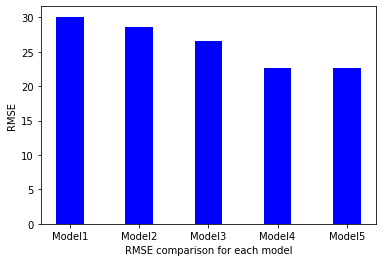

In [84]:
list_1 = [RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5]
name = ['Model1', 'Model2','Model3','Model4','Model5']
x = list(range(len(list_1)))
plt.bar(x,list_1, width = 0.4, label = 'RMSE',tick_label = name, color = 'b')

plt.xlabel('RMSE comparison for each model',fontsize=10)
plt.ylabel('RMSE',fontsize=10)

plt.show()

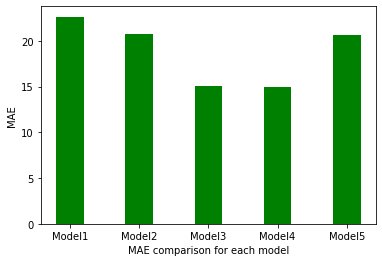

In [85]:
list_1 = [MAE_1,MAE_2,MAE_3,MAE_4,MAE_5]
name = ['Model1', 'Model2','Model3','Model4','Model5']
x = list(range(len(list_1)))
plt.bar(x,list_1, width = 0.4, label = 'RMSE',tick_label = name, color = 'g')

plt.xlabel('MAE comparison for each model',fontsize=10)
plt.ylabel('MAE',fontsize=10)

plt.show()

1. Model 3 (Regression tree) has the best performance
2. Model 4 (Random Forest) is the second best.

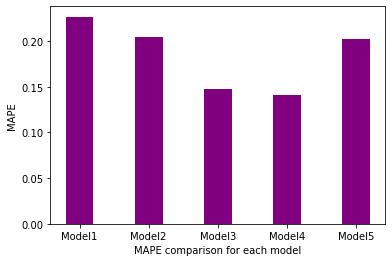

In [86]:
list_1 = [MAPE_1,MAPE_2,MAPE_3,MAPE_4,MAPE_5]
name = ['Model1', 'Model2','Model3','Model4','Model5']
x = list(range(len(list_1)))
plt.bar(x,list_1, width = 0.4, label = 'RMSE',tick_label = name, color = 'purple')

plt.xlabel('MAPE comparison for each model',fontsize=10)
plt.ylabel('MAPE',fontsize=10)

plt.show()

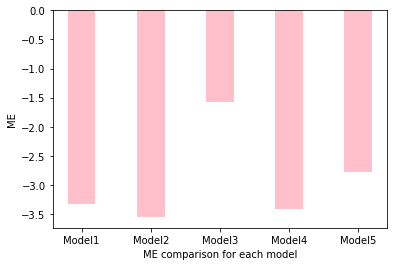

In [87]:
list_1 = [ME_1,ME_2,ME_3,ME_4,ME_5]
name = ['Model1', 'Model2','Model3','Model4','Model5']
x = list(range(len(list_1)))
plt.bar(x,list_1, width = 0.4, label = 'RMSE',tick_label = name, color = 'pink')

plt.xlabel('ME comparison for each model',fontsize=10)
plt.ylabel('ME',fontsize=10)

plt.show()

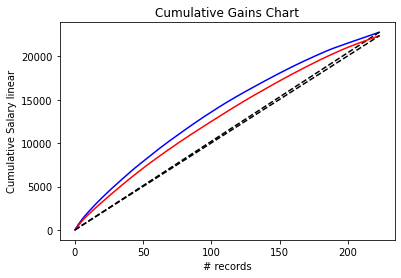

In [88]:
pre = pd.Series(prune_Tree.predict(valid_X))
pre = pre.sort_values(ascending = False)

pre1 = pd.Series(Ran.predict(valid_X))
pre1 = pre1.sort_values(ascending = False)

fig, axes = plt.subplots(nrows = 1, ncols = 1 )
ax = gainsChart(pre, ax=axes,color = 'blue')
ax = gainsChart(pre1, ax=axes,color = 'red')

ax.set_ylabel('Cumulative Salary linear')
ax.set_title('Cumulative Gains Chart')

plt.show()